# Covid19 Data Analysis
------------------------------------------

### Importing Modules

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

### Importing covid19 dataset


In [9]:
covid_data = pd.read_csv("covid19_Confirmed_dataset.csv")
covid_data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [10]:
covid_data.shape

(266, 104)

### Removing useless columns

In [11]:
covid_data.drop(["Lat","Long"],axis=1,inplace=True)

In [12]:
covid_data.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


### Aggregating the rows by the country

In [14]:
covid_data_agg = covid_data.groupby("Country/Region").sum()

In [15]:
covid_data_agg.head(3)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006


In [16]:
covid_data_agg.shape

(187, 100)

### Visualizing data related to a country 

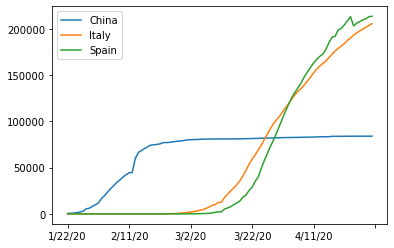

In [19]:
covid_data_agg.loc["China"].plot()
covid_data_agg.loc["Italy"].plot()
covid_data_agg.loc["Spain"].plot()
plt.legend()

### Calculating a good measure  

<AxesSubplot:>

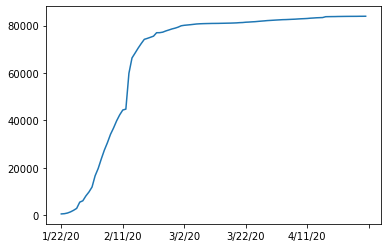

In [20]:
covid_data_agg.loc['China'].plot()

<AxesSubplot:>

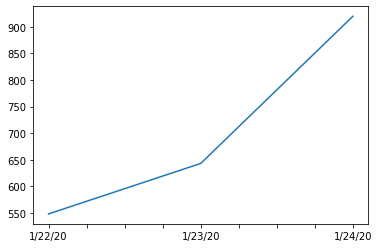

In [21]:
covid_data_agg.loc["China"][:3].plot()

### Caculating the first derivative of the curve

<AxesSubplot:>

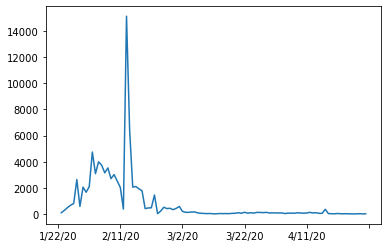

In [22]:
covid_data_agg.loc["China"].diff().plot()

###  Finding maxmimum infection rate for China

In [23]:
covid_data_agg.loc["China"].diff().max()

15136.0

In [24]:
covid_data_agg.loc["Italy"].diff().max()

6557.0

In [25]:
covid_data_agg.loc["Spain"].diff().max()

9630.0

### Finding maximum infection rate for all of the countries. 

In [26]:
countries = list(covid_data_agg.index)
max_infection_rates = []
for x in countries:
    max_infection_rates.append(covid_data_agg.loc[x].diff().max())
covid_data_agg["max_infection_rates"] = max_infection_rates

In [27]:
covid_data_agg.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,max_infection_rates
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.0
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5.0


### Creating a new dataframe with the only needed column 

In [28]:
covid_data2 = pd.DataFrame(covid_data_agg["max_infection_rates"])

In [29]:
covid_data2.head()

,max_infection_rates
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0



- Importing the WorldHappinessReport.csv dataset
- Selecting needed columns for analysis 
- Merging the datasets 
- Calculating the correlations as the result of our analysis

### Importing dataset

In [36]:
happiness_report_csv = pd.read_csv("worldwide_happiness_report.csv")

In [37]:
happiness_report_csv.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


### Drop unnecessary columns

In [38]:
useless_cols = ["Overall rank","Score","Generosity","Perceptions of corruption"]

In [39]:
happiness_report_csv.set_index("Country or region",inplace=True)
happiness_report_csv.head()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country or region,,,,,,,,
Finland,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393
Denmark,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410
Norway,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341
Iceland,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118
Netherlands,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298


### Merging the prepared datasets

#### Covid Dataset :

In [40]:
covid_data2.shape

(187, 1)

#### Wolrd Happiness report dataset :

In [41]:
happiness_report_csv.head()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country or region,,,,,,,,
Finland,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393
Denmark,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410
Norway,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341
Iceland,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118
Netherlands,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [42]:
happiness_report_csv.shape

(156, 8)

In [44]:
data = covid_data2.join(happiness_report_csv,how = "inner")
data.head()

,max_infection_rates,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Afghanistan,232.0,154,3.203,0.350,0.517,0.361,0.000,0.158,0.025
Albania,34.0,107,4.719,0.947,0.848,0.874,0.383,0.178,0.027
Algeria,199.0,88,5.211,1.002,1.160,0.785,0.086,0.073,0.114
Argentina,291.0,47,6.086,1.092,1.432,0.881,0.471,0.066,0.050
Armenia,134.0,116,4.559,0.850,1.055,0.815,0.283,0.095,0.064


In [45]:
data.corr() #Correlation matrix

,max_infection_rates,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
max_infection_rates,1.000000,-0.244777,0.228783,0.250118,0.191958,0.289263,0.078196,-0.114635,0.097703
Overall rank,-0.244777,1.000000,-0.988972,-0.802204,-0.780955,-0.804753,-0.570490,-0.063107,-0.389360
Score,0.228783,-0.988972,1.000000,0.793847,0.788591,0.799893,0.587007,0.090420,0.420437
GDP per capita,0.250118,-0.802204,0.793847,1.000000,0.759468,0.863062,0.394603,-0.103870,0.311577
Social support,0.191958,-0.780955,0.788591,0.759468,1.000000,0.765286,0.456246,-0.061361,0.203225
Healthy life expectancy,0.289263,-0.804753,0.799893,0.863062,0.765286,1.000000,0.427892,-0.068387,0.314811
Freedom to make life choices,0.078196,-0.570490,0.587007,0.394603,0.456246,0.427892,1.000000,0.258539,0.446677
Generosity,-0.114635,-0.063107,0.090420,-0.103870,-0.061361,-0.068387,0.258539,1.000000,0.326166
Perceptions of corruption,0.097703,-0.389360,0.420437,0.311577,0.203225,0.314811,0.446677,0.326166,1.000000


###  Visualization of the results

In [46]:
data.head()

,max_infection_rates,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Afghanistan,232.0,154,3.203,0.350,0.517,0.361,0.000,0.158,0.025
Albania,34.0,107,4.719,0.947,0.848,0.874,0.383,0.178,0.027
Algeria,199.0,88,5.211,1.002,1.160,0.785,0.086,0.073,0.114
Argentina,291.0,47,6.086,1.092,1.432,0.881,0.471,0.066,0.050
Armenia,134.0,116,4.559,0.850,1.055,0.815,0.283,0.095,0.064


### Plotting GDP vs maximum Infection rate

C:\Users\sairam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GDP per capita', ylabel='max_infection_rates'>

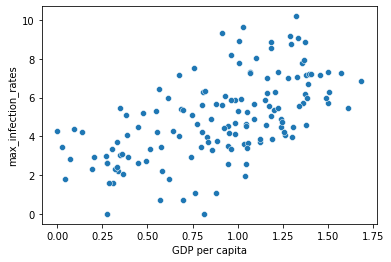

In [48]:
x = data["GDP per capita"]
y = data["max_infection_rates"]
sns.scatterplot(x,np.log(y)) 

C:\Users\sairam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GDP per capita', ylabel='max_infection_rates'>

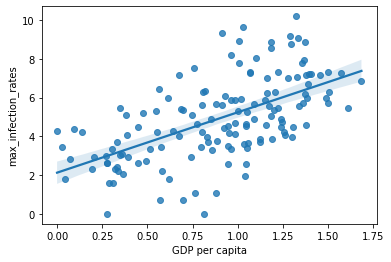

In [49]:
sns.regplot(x,np.log(y))

### Plotting Social support vs maximum Infection rate

In [50]:
x = data["Social support"]
y = data["max_infection_rates"]

C:\Users\sairam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Social support', ylabel='max_infection_rates'>

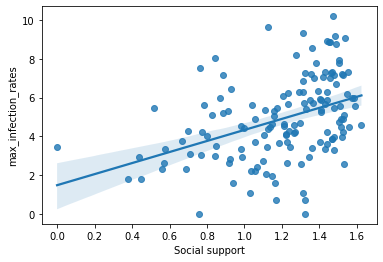

In [51]:
sns.regplot(x,np.log(y))

### Plotting Healthy life expectancy vs maximum Infection rate

In [52]:
x = data["Healthy life expectancy"]
y = data["max_infection_rates"]

C:\Users\sairam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Healthy life expectancy', ylabel='max_infection_rates'>

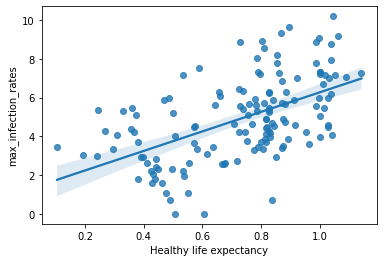

In [53]:
sns.regplot(x,np.log(y))

### Plotting Freedom to make life choices vs maximum Infection rate

In [54]:
x = data["Freedom to make life choices"]
y = data["max_infection_rates"]

C:\Users\sairam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Freedom to make life choices', ylabel='max_infection_rates'>

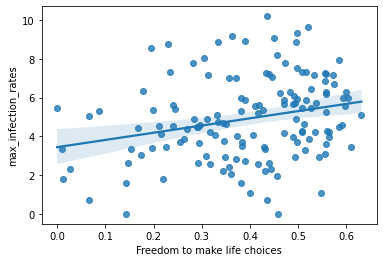

In [55]:
sns.regplot(x,np.log(y))